In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from forward.simple_model import SimpleLayerDataset, SimpleLayerProblem, SimpleLayerModel

model = SimpleLayerModel([],[],source_pos = [75],detector_pos=np.arange(0,2500,10),
                     sample_period=0.01,duration=[],pulse_width=0.02)

problem = SimpleLayerProblem(model,n_samples=100,interval=5,thickness=100,speed=(1000,3000))

train_dataset = SimpleLayerDataset(problem,n_samples=1000)
val_dataset = SimpleLayerDataset(problem,n_samples=100)


In [ ]:
import importlib
importlib.reload(some_module)

In [3]:
amp,speed = problem.generate_pair()
print(amp.shape)
print(speed.shape)

(100, 250, 1)
(100,)


In [4]:
from models.unet_model import BottleNet
from train import train_net
import torch
import logging

load = ''

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

# n_channels = number of shots
net = BottleNet(1,amp.squeeze().shape,len(speed))

logging.info(f'Network:\n'
             f'\t{net.n_channels} input channels\n')

if load:
    net.load_state_dict(
        torch.load(load, map_location=device)
    )
    logging.info(f'Model loaded from {load}')

net.to(device=device)
# faster convolutions, but more memory
# cudnn.benchmark = True

try:
    train_net(net,
              train_dataset,
              val_dataset,
              device,
              batch_size=1
             )

except KeyboardInterrupt:
    torch.save(net.state_dict(), 'INTERRUPTED.pth')
    logging.info('Saved interrupt')
    try:
        sys.exit(0)
    except SystemExit:
        os._exit(0)

INFO: Using device cpu
INFO: Network:
	1 input channels

INFO: Starting training:
        Epochs:          5
        Batch size:      1
        Learning rate:   0.1
        Training size:   1000
        Validation size: 100
        Checkpoints:     True
        Device:          cpu
    


INFO: Saved interrupt


NameError: name 'sys' is not defined

In [10]:
item = next(iter(train_dataset))
a = item['amplitudes']
s = item['speeds']

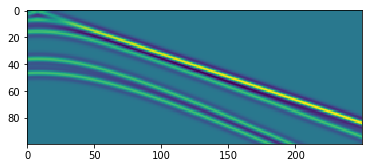

In [7]:
%matplotlib inline
plt.figure()
plt.imshow(a.squeeze())

In [30]:
speeds_pred = net(a.unsqueeze(0).float())
s_pred = speeds_pred.detach().cpu().numpy()

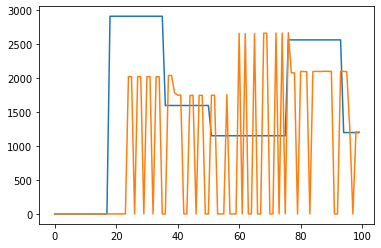

In [31]:
plt.figure()
plt.plot(s)
plt.plot(s_pred)